# Initialization

In [61]:
#------------------------------INITIALIZATION----------------------------------

from google.colab import drive
drive.mount('/content/gdrive')

!ls /content/gdrive/My\ Drive/Dora/Bilkent/CS464/HW2 # Use YOUR OWN DIRECTORY!!


import os
import csv
import math
import random
import operator
import pdb
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from timeit import default_timer as timer


np.random.seed(123)

root = '/content/gdrive/My Drive/Dora/Bilkent/CS464/HW2'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
digits.csv		      question-3-features-train.csv
question-2-features.csv       question-3-labels-test.csv
question-2-labels.csv	      question-3-labels-train.csv
question-3-features-test.csv


# Question 1


------------------------- QUESTION 1 -------------------------

      label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0         7    0    0    0    0    0  ...      0      0      0      0      0      0
1         2    0    0    0    0    0  ...      0      0      0      0      0      0
2         1    0    0    0    0    0  ...      0      0      0      0      0      0
3         0    0    0    0    0    0  ...      0      0      0      0      0      0
4         4    0    0    0    0    0  ...      0      0      0      0      0      0
...     ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
9995      2    0    0    0    0    0  ...      0      0      0      0      0      0
9996      3    0    0    0    0    0  ...      0      0      0      0      0      0
9997      4    0    0    0    0    0  ...      0      0      0      0      0      0
9998      5    0    0    0    0    0  ...      0      0      0      0      0      0
9999      6

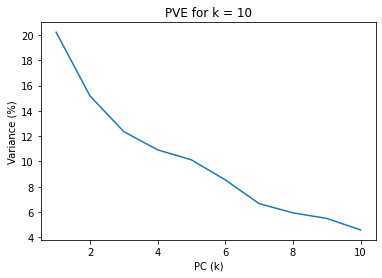

In [53]:
#-------------------------------QUESTION 1--------------------------------------

#-------------------------Question 1.1-----------------------------

print("\n------------------------- QUESTION 1 -------------------------\n" )
digits_csv = os.path.join(root, 'digits.csv')

#read the csv files with the first column being the header
pd_digits = pd.read_csv(digits_csv, header=0)
pd_digits_new = pd_digits.drop(columns = "label")
digits = pd_digits_new.to_numpy()

#PCA as a function, returns eigenvlaues, principle component matrix, and the reduced matrix
def PCA(data, k_pcomponents) :

    #computing eigenvalues and eigenvectors of the covariance matrix
    data_meaned = (data - np.mean(data.T,axis=1)).T # subtract the mean (along columns)
    eigenvalues, eigenvectors = np.linalg.eigh(np.cov(data_meaned))

    p = np.size(eigenvectors,axis=1) 
    sorted_index = np.argsort(eigenvalues)[::-1] #sort eigenvalue indexes in ascending order
    
    #sorting the eigenvectors according to the sorted eigenvalue indexes
    eigenvectors = eigenvectors[:,sorted_index]  # sorting eigenvectors
    eigenvalues = eigenvalues[sorted_index] # sorting eigenvalues

    if k_pcomponents < p and k_pcomponents >= 0:
        eigenvectors = eigenvectors[:,range(k_pcomponents)] #obtaining PCs
        eigenvalues = eigenvalues[range(k_pcomponents)]

    data_reduced = np.dot(eigenvectors.T, data_meaned) #projectioning data into the reduced space
    return eigenvalues, eigenvectors, data_reduced

def PVE(principal_eigenvalues) :
    
    sum_eigenvalues = principal_eigenvalues.sum(axis=0)
    variance_matrix = principal_eigenvalues/sum_eigenvalues 
    #each column in variance_matrix corresponds to the PVE of a PC
    return variance_matrix

def Reshape28x28(principal_components, k_pcomponents) :
    
    principal_components = principal_components.T 
    reshaped_matrix = []

    for k in range(k_pcomponents) :
        square_component = principal_components[k].reshape(28, 28)
        reshaped_matrix.append(square_component)
        
    return reshaped_matrix


k_pcomponents = 10
digits_eigenvalues, digits_pcomponents , digits_reduced = PCA(digits, k_pcomponents)
digits_variance = PVE(digits_eigenvalues)
reshaped_pcomponents = Reshape28x28(digits_pcomponents, k_pcomponents)

print(digits_pcomponents.shape)
print("\nPrincipal Components Matrix, where columns refer to each principle component:")
print(pd.DataFrame(digits_pcomponents)) #transform PC's into database
print("\nReduced Matrix")
print(pd.DataFrame(digits_reduced))
print("\nPrincipal Values Explained Matrix, rows refer to each principle component's PVE:")
print(pd.DataFrame(digits_variance))  
print()

for k in range(k_pcomponents) :
    print("\nPrincipal component {} reshaped as a 28x28 matrix: ".format(k+1))
    print(pd.DataFrame(reshaped_pcomponents[k]))

print()


myarr = []
for j in range(k_pcomponents):
  myarr.append(j+1) 

plt.plot( myarr , digits_variance.transpose()*100)
plt.title("PVE for k = {}".format(k_pcomponents))
plt.ylabel('Variance (%)')
plt.xlabel('PC (k)')
plt.show()


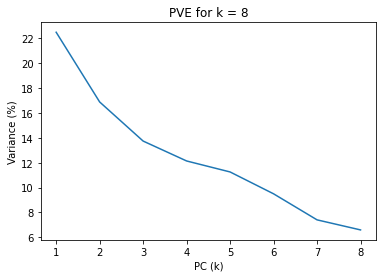

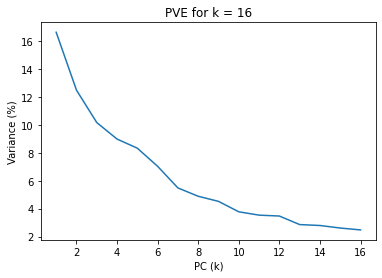

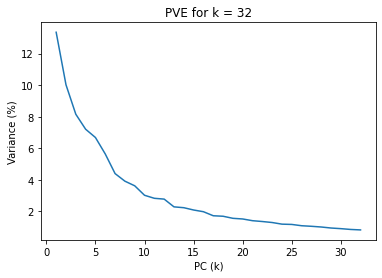

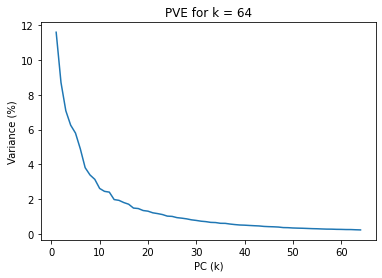

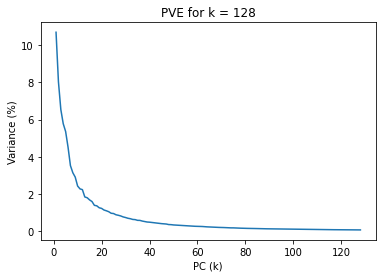

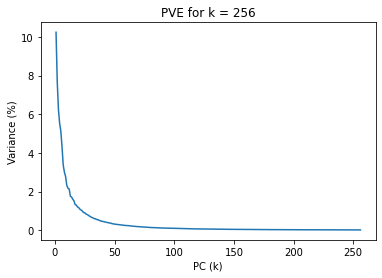

In [54]:
#-------------------------Question 1.2-----------------------------

k_matrix = [8, 16, 32, 64, 128, 256]
variance = [0]*6

for i in range(len(k_matrix)):
    peigens, pcomponents , reduced = PCA(digits, k_matrix[i])
    variance[i] = PVE(peigens)

    num = k_matrix[i]
    arr = []
    for j in range(num):
        arr.append(j+1)
    
    print()
    plt.plot( arr , variance[i].transpose()*100)
    plt.title("PVE for k = {}".format(num))
    plt.ylabel('Variance (%)')
    plt.xlabel('PC (k)')
    plt.show()
    


Image Reconstructions are: 



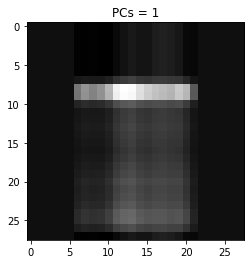

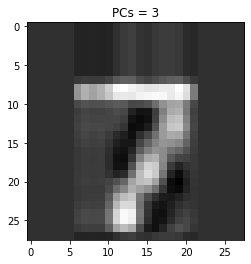

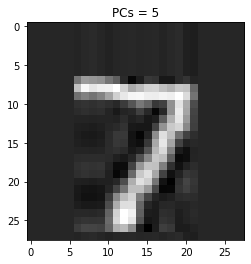

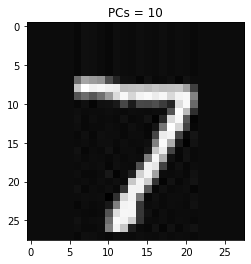

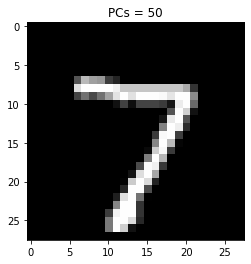

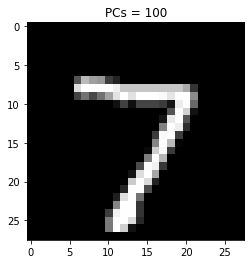

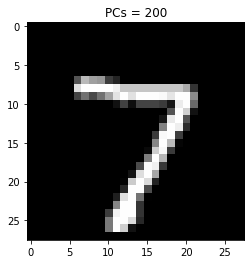

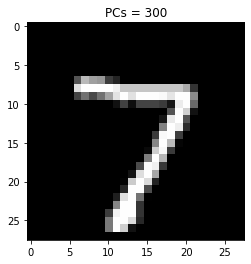

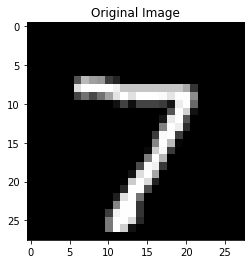

In [57]:
#-------------------------Question 1.3-----------------------------

print("\nImage Reconstructions are: \n")
from pylab import imshow,title,figure,show

first_image = digits[0].reshape(28, 28)
k_pcomponents = [1,3,5,10,50,100,200,300]

def Reconstruction(image28x28, k_pcomponent):

    eigenvalues, reshaped_pcomponent , reduced = PCA(image28x28, k_pcomponent) # image reconstruction
    recon = np.dot(reshaped_pcomponent, reduced).T + np.mean(image28x28,axis=0)

    return recon


first_digit = digits[0].reshape(28, 28) 

for k_pcomponent in k_pcomponents:

    recon_image = Reconstruction(first_digit, k_pcomponent)
    figure()
    imshow(recon_image)
    title('PCs = '+str(k_pcomponent))

figure()
imshow(first_digit)
title('Original Image')
show()

# Question 2

The rank of X transpose times X is: 5

1ST ORDER LINEAR REGRESSION ANALYSIS:

Trained Beta Coefficients for 1st Order Linear Regression are: 
 b0 = -43580.743094474354 
 b1 = 280.6235678974484 
 


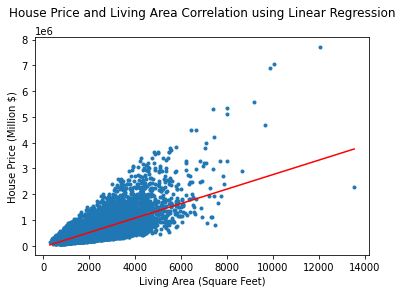


The Mean Square Error for 1st Order LR is : 201200997618.10632 


2ND ORDER LINEAR REGRESSION ANALYSIS:

Trained Beta Coefficients for 2nd Order Linear Regression are: 
 b0 = 199222.27930548566 
 b1 = 67.99409468579292 
 b2 = 0.038581260937201815 
 


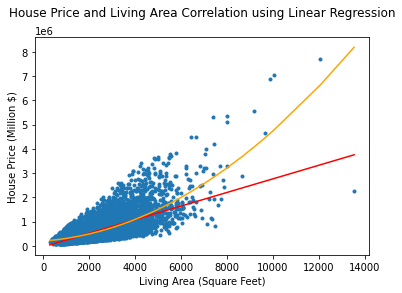


The Mean Square Error for 2nd order LR is : 206577201240.17664


In [41]:
#-------------------------------QUESTION 2--------------------------------------

print("\n------------------------- QUESTION 2 -------------------------\n" )
home_features = os.path.join(root, 'question-2-features.csv')
home_prices = os.path.join(root, 'question-2-labels.csv')

df_home_features = pd.read_csv(home_features, header=0)
df_home_prices = pd.read_csv(home_prices, header=0)

array_home_features = df_home_features.to_numpy()
array_home_prices = df_home_prices.to_numpy()
ones_array = np.array([np.ones(len(array_home_features[:]))])

array_concat_features = np.concatenate((ones_array.T, array_home_features), axis = 1)

xTx = np.matmul(array_concat_features.transpose(), array_concat_features)
yTy = np.matmul(array_home_prices.transpose(), array_home_prices)

rank_features = np.linalg.matrix_rank(xTx)
rank_labels = np.linalg.matrix_rank(yTy)
print('The rank of X transpose times X is: {}'.format(rank_features))

def SolveClosedForm(features, labels):
    first_matrix = np.matmul(features.transpose(), features)
    first_matrix = np.linalg.inv(first_matrix) # this calculates ((x^T)x)^(-1), however it is a constant, so it cannot be inverted, since its the same
    second_matrix = np.matmul(features.transpose(), labels) # this calculates (x^T)y
    predicted_coeffs = np.matmul(first_matrix, second_matrix) # predicted beta set, since both are just integers, this operation is ok.
    return predicted_coeffs


#linear regression to fit into a first order equation
print("\n1ST ORDER LINEAR REGRESSION ANALYSIS:")

array_concat_sqftliving = array_concat_features[:,[0,1]]

beta_prediction = SolveClosedForm(array_concat_sqftliving, array_home_prices)
b0 = beta_prediction[0][0]
b1 = beta_prediction[1][0]
print("\nTrained Beta Coefficients for 1st Order Linear Regression are: \n b0 = {} \n b1 = {} \n ".format(b0, b1))

living_area = array_concat_sqftliving[:,1]
sorted_livingarea = np.sort(living_area)
predicted_prices = b0+b1*sorted_livingarea

plt.plot(living_area, array_home_prices, '.')
plt.plot(sorted_livingarea, predicted_prices, 'red')
plt.title("House Price and Living Area Correlation using Linear Regression\n")
plt.ylabel('House Price (Million $)')
plt.xlabel('Living Area (Square Feet)')
plt.show()

MSE = np.square(np.subtract(array_home_prices, predicted_prices)).mean()

print('\nThe Mean Square Error for 1st Order LR is : {} \n'.format(MSE))


#linear regression to fit into a second order equation
print("\n2ND ORDER LINEAR REGRESSION ANALYSIS:")

array_sqftliving_squared = np.array([np.square(array_concat_sqftliving[:,1])])
array_concatsqr_sqftliving = np.concatenate((array_concat_sqftliving, array_sqftliving_squared.T), axis = 1)

sqrbeta_prediction = SolveClosedForm(array_concatsqr_sqftliving, array_home_prices)
b0 = sqrbeta_prediction[0][0]
b1 = sqrbeta_prediction[1][0]
b2 = sqrbeta_prediction[2][0]
print("\nTrained Beta Coefficients for 2nd Order Linear Regression are: \n b0 = {} \n b1 = {} \n b2 = {} \n ".format(b0, b1, b2))

living_area_sqr = np.square(living_area)
sorted_livingareasqr = np.sort(living_area_sqr)
sqrpredicted_prices = b0 + b1*sorted_livingarea + b2*sorted_livingareasqr

plt.plot(living_area, array_home_prices, '.')
plt.plot(sorted_livingarea, predicted_prices,'red')
plt.plot(sorted_livingarea, sqrpredicted_prices, 'orange' )
plt.title("House Price and Living Area Correlation using Linear Regression\n")
plt.ylabel('House Price (Million $)')
plt.xlabel('Living Area (Square Feet)')
plt.show()

MSE = np.square(np.subtract(array_home_prices, sqrpredicted_prices)).mean()

print('\nThe Mean Square Error for 2nd order LR is : {}'.format(MSE))


# Question 3

In [65]:
#-------------------------------QUESTION 3--------------------------------------

print("\n------------------------- QUESTION 3 -------------------------\n" )

train_features = os.path.join(root, 'question-3-features-train.csv')
train_labels = os.path.join(root, 'question-3-labels-train.csv')
test_features = os.path.join(root, 'question-3-features-test.csv')
test_labels = os.path.join(root, 'question-3-labels-test.csv')

df_train_features = pd.read_csv(train_features, header=0)
df_train_labels = pd.read_csv(train_labels, header=0)
df_test_features = pd.read_csv(test_features, header=0)
df_test_labels = pd.read_csv(test_labels, header=0)

concat_train = pd.concat([df_train_labels, df_train_features] , axis = 1)
concat_test =  pd.concat([df_test_labels, df_test_features] , axis = 1)

array_train_features = concat_train.to_numpy()[:,1:30]
array_train_labels = concat_train.to_numpy()[:,0]

def sigmoid(score):
    return 1/(1 + np.exp(-score))

def Performance(weights, test_features, test_label, best_one = False):

    w0 = weights[0]
    wi = weights[1:len(weights)]

    #this function is defined to compute the confusion matrix values for the ML models.
    prediction_matrix = []*len(test_features)
    true_positive = 0
    true_negative = 0
    false_negative = 0
    false_positive = 0

    for c in range(len(test_features)):
        score = w0 + np.sum(np.dot(test_features[c], wi))
        fraud_true = sigmoid(score)
        fraud_false = 1-sigmoid(score)
        
        if fraud_false > fraud_true:
            prediction = 0
        elif fraud_false < fraud_true:
            prediction = 1
        elif fraud_false == fraud_true:
            prediction = 0
    
        #for i in range(len(prediction_matrix)):
        if prediction == 1 and prediction == test_label[c] :
            true_positive += 1
        elif prediction == 0 and prediction == test_label[c] :
            true_negative += 1
        elif prediction == 1 and prediction != test_label[c] :
            false_positive += 1
        elif prediction == 0 and prediction != test_label[c] :
            false_negative += 1

    accuracy = (true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive)*100
    precision = true_positive / (true_positive + false_positive)*100
    recall = true_positive / (true_positive + false_negative)*100
    npv = true_negative / (true_negative + false_negative)*100
    fpr = false_positive / (true_negative + false_positive)*100
    fdr = false_positive / (true_positive + false_positive)*100
    f1 = 2*precision*recall/(precision + recall)/100
    beta = 2 
    f2 = (beta^2+1)*precision*recall/((beta^2)*precision + recall)/100  #beta f-measure with beta = 2, giving extra weight to recall

    print('Number of True Positives: ', true_positive)
    print('Number of True Negatives: ', true_negative)
    print('Number of False Positives: ', false_positive)
    print('Number of False Negatives: ', false_negative)
    print('Accuracy is ', accuracy, ' %')
    
    if best_one :
        print('Precision is ', precision, '%')
        print('Recall is ', recall, '%')
        print('Negative Predictive Value is ', npv, '%')
        print('False Positive Rate is ', fpr, '%')
        print('False Discovery Rate is ', fdr, '%')
        print('F1 measure is ', f1)
        print('F1 measure is ', f2)



def Normalize(input_array):
    normalized_array = np.zeros(len(input_array))
    minimum = min(input_array)
    maximum = max(input_array)
    
    for i in range(len(input_array)):
        normalized_array[i] = (input_array[i] - minimum)/(maximum - minimum)
    return normalized_array

def BatchGradAscent(features, labels, rate):
    
    weights = np.zeros(len(features[0])+1) 
    w0 = weights[0]
    wi = weights[1:len(weights)]
    iterations = 1000

    for iteration in range(iterations):
        score = w0 + np.dot(features, wi)
        predictions = sigmoid(score)
        error = labels - predictions
        dgradient = np.dot(features.T, error)
        
        w0 += rate * np.sum(error)
        wi += rate * dgradient

    predicted_weights = np.append(w0, wi)

    return predicted_weights


# function to create a list containing mini-batches
def MiniBatches(features, labels, batch_size):
    mini_batches = []
    featuresdf = pd.DataFrame(features)
    labelsdf = pd.DataFrame(labels)
    concat_matrix = pd.concat([featuresdf, labelsdf], axis=1)
    data = concat_matrix.to_numpy()
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        features_mini = mini_batch[:, :-1]
        labels_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((features_mini, labels_mini))

    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        features_mini = mini_batch[:, :-1]
        labels_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((features_mini, labels_mini))

    return mini_batches
  
# function to perform mini-batch gradient descent
def MiniGradientDescent(features, labels, rate, batch_size = 100):
    weights = np.random.normal(0, 0.01, len(features[0])+1) 
    w0 = weights[0]
    wi = weights[1:len(weights)]
    iterations = 1000

    for iteration in range(iterations):
        mini_batches = MiniBatches(features, labels, batch_size)
        for mini_batch in mini_batches :
            features_mini, labels_mini = mini_batch
            score = w0 + np.dot(features_mini, wi)
            
            predictions = sigmoid(score)
            error = labels_mini.flatten() - predictions
          
            dgradient = np.dot(features_mini.T, error)

            w0 += rate * np.sum(error)
            wi += rate * dgradient

    predicted_weights = np.append(w0, wi)

    return predicted_weights

array_train_features[:, 28] = Normalize(array_train_features[:, 28])

log_scale = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
trained_weights = [0]*len(log_scale)

array_test_labels = concat_test.to_numpy()[:,0]
array_test_features = concat_test.to_numpy()[:,1:30]
array_test_features[:, 28] = Normalize(array_test_features[:, 28])

tic = [0]*len(log_scale)
toc = [0]*len(log_scale)

for r in range(len(log_scale)):

    tic[r] = time.perf_counter()
    trained_weights[r] = BatchGradAscent(array_train_features, array_train_labels, log_scale[r])
    toc[r] = time.perf_counter()
    print('\nConfusion Matrix for learning rate = {} : '.format(log_scale[r]))
    Performance(trained_weights[r], array_test_features, array_test_labels)
    print()

print('\nIt seems that the learning rate = 0.001 gives the best results, as the accuracy and precision rates are as high as small rates, and\nis less computationally expensive than the small rates, and there is no decrease in precision like in the larger rates.')
print('\n=> Performance Metrics for Full Batch Gradient Ascent are:\n')
Performance(trained_weights[2], array_test_features, array_test_labels, best_one = True)
print(f"\nTotal time elapsed for full batch gradient ascent is {toc[2] - tic[2]:0.4f} seconds")

tic = time.perf_counter()
minibatch_weights = MiniGradientDescent(array_train_features, array_train_labels, log_scale[2])
toc = time.perf_counter()
print('\n => Performing the Mini Patch Gradient Ascent for Batch Size = 100, the following Performance Metrics are obtained: \n')
Performance(minibatch_weights, array_test_features, array_test_labels, best_one = True)
print(f"\nTotal time elapsed for mini batch gradient ascent is {toc - tic:0.4f} seconds")

#stochastic gradient ascent is basically mini batch with batch size of 1.
tic = time.perf_counter()
stochastic_weights = MiniGradientDescent(array_train_features, array_train_labels, log_scale[2], batch_size=1)
toc = time.perf_counter()
print('\n=> Performing the Stochastic Gradient Ascent, the following Performance Metrics are obtained: \n')
Performance(stochastic_weights, array_test_features, array_test_labels, best_one = True)
print(f"\nTotal time elapsed for stochastic gradient ascent is {toc - tic:0.4f} seconds")





------------------------- QUESTION 3 -------------------------


Confusion Matrix for learning rate = 1e-05 : 
Number of True Positives:  83
Number of True Negatives:  1100
Number of False Positives:  2
Number of False Negatives:  15
Accuracy is  98.58333333333333  %


Confusion Matrix for learning rate = 0.0001 : 
Number of True Positives:  83
Number of True Negatives:  1100
Number of False Positives:  2
Number of False Negatives:  15
Accuracy is  98.58333333333333  %


Confusion Matrix for learning rate = 0.001 : 
Number of True Positives:  84
Number of True Negatives:  1099
Number of False Positives:  3
Number of False Negatives:  14
Accuracy is  98.58333333333333  %


Confusion Matrix for learning rate = 0.01 : 
Number of True Positives:  88
Number of True Negatives:  1091
Number of False Positives:  11
Number of False Negatives:  10
Accuracy is  98.25  %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp



Confusion Matrix for learning rate = 0.1 : 
Number of True Positives:  89
Number of True Negatives:  1071
Number of False Positives:  31
Number of False Negatives:  9
Accuracy is  96.66666666666667  %


It seems that the learning rate = 0.001 gives the best results, as the accuracy and precision rates are as high as small rates, and
is less computationally expensive than the small rates, and there is no decrease in precision like in the larger rates.

=> Performance Metrics for Full Batch Gradient Ascent are:

Number of True Positives:  84
Number of True Negatives:  1099
Number of False Positives:  3
Number of False Negatives:  14
Accuracy is  98.58333333333333  %
Precision is  96.55172413793103 %
Recall is  85.71428571428571 %
Negative Predictive Value is  98.74213836477988 %
False Positive Rate is  0.27223230490018147 %
False Discovery Rate is  3.4482758620689653 %
F1 measure is  0.908108108108108
F1 measure is  0.9655172413793103

Total time elapsed for full batch gradient ascent i